In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T)/M
    paths = np.zeros((M+1,I), np.float64)
    paths[0] = S0
    for t in range(1,M+1):
        rand = np.random.standard_normal(I)
        rand = (rand-rand.mean()) / rand.std()
        paths[t]= paths[t-1]* np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*rand)
    return paths

Text(0, 0.5, 'index level')

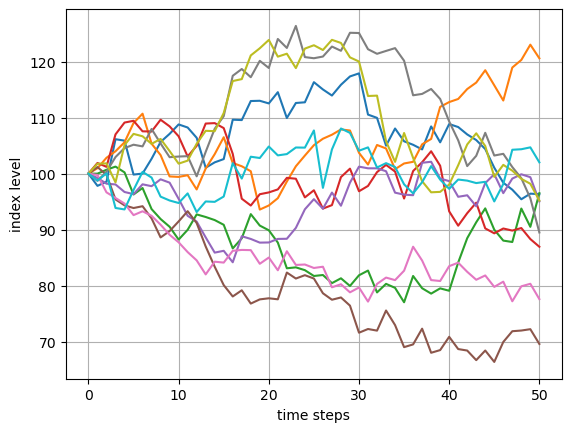

In [3]:
S0 = 100.
r= 0.05
sigma = 0.2
T= 1.0
M = 50
I = 250000

paths = gen_paths(S0, r,sigma, T, M, I)

plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [4]:
log_returns = np.log(paths[1:] / paths[0:-1])
paths[:,0].round(2)

array([100.  ,  97.82,  98.56, 106.15, 105.9 ,  99.84, 100.01, 102.66,
       105.66, 107.11, 108.79, 108.24, 106.41, 101.06, 102.02, 102.61,
       109.64, 109.57, 112.98, 113.02, 112.55, 114.56, 109.94, 112.63,
       112.75, 116.35, 115.04, 113.96, 115.88, 117.37, 117.92, 110.55,
       109.97, 105.  , 108.07, 105.78, 105.16, 104.33, 108.44, 105.6 ,
       108.87, 108.33, 107.01, 106.  , 104.4 , 101.06,  98.38,  97.13,
        95.43,  96.43,  96.34])

In [5]:
log_returns[:,0].round(2)

array([-0.02,  0.01,  0.07, -0.  , -0.06,  0.  ,  0.03,  0.03,  0.01,
        0.02, -0.01, -0.02, -0.05,  0.01,  0.01,  0.07, -0.  ,  0.03,
        0.  , -0.  ,  0.02, -0.04,  0.02,  0.  ,  0.03, -0.01, -0.01,
        0.02,  0.01,  0.  , -0.06, -0.01, -0.05,  0.03, -0.02, -0.01,
       -0.01,  0.04, -0.03,  0.03, -0.  , -0.01, -0.01, -0.02, -0.03,
       -0.03, -0.01, -0.02,  0.01, -0.  ])

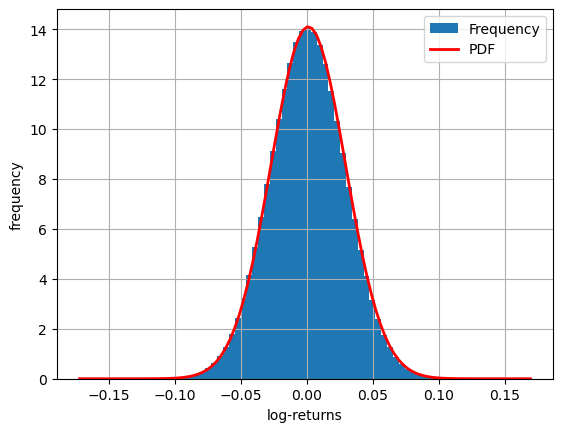

In [7]:
plt.hist(log_returns.flatten(), bins = 70, density = True, label = 'Frequency')
plt.grid(True)
plt.xlabel('log-returns')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1],100)
plt.plot(x, scs.norm.pdf(x,loc= r/ M, scale = sigma/np.sqrt(M)), 'r', lw = 2.0, label = 'PDF')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


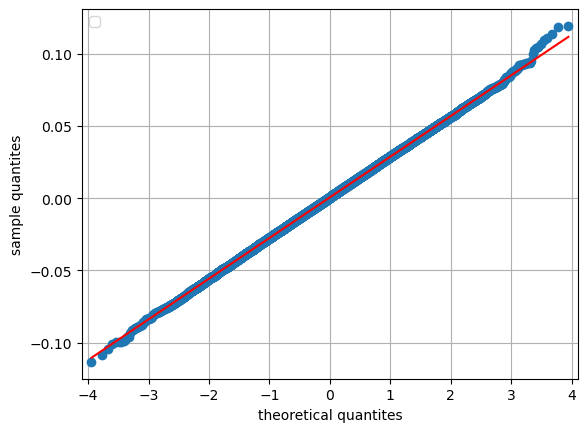

In [9]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantites')
plt.ylabel('sample quantites')
plt.legend()

In [12]:
def norm_tests(arr):
    print(f'skew:      %14.3f' %scs.skew(arr))
    print(f'skew pval: %14.3f' %scs.skewtest(arr)[1])
    print(f'Kurt:      %14.3f' %scs.kurtosis(arr))
    print(f'Kurt pval: %14.3f' %scs.kurtosistest(arr)[1])
    print(f'norm pval: %14.3f' %scs.normaltest(arr)[1])

norm_tests(log_returns.flatten())

skew:               0.001
skew pval:          0.430
Kurt:               0.001
Kurt pval:          0.541
norm pval:          0.607


Text(0.5, 1.0, 'log data')

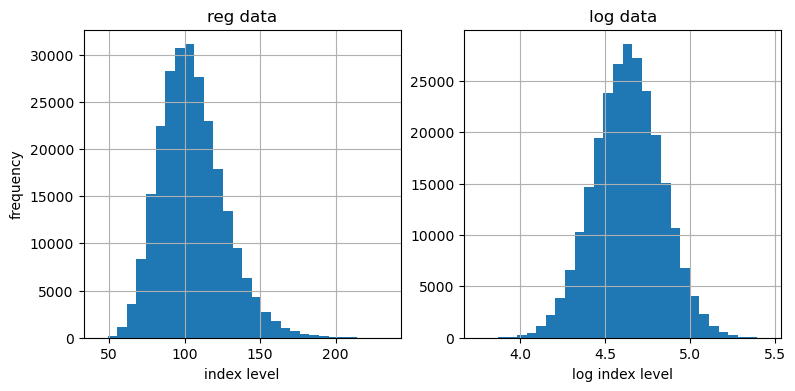

In [16]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (9,4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('reg data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [18]:
print("log returns:")
print(norm_tests(log_returns.flatten()))
print('normal data:')
print(norm_tests(paths.flatten()))

log returns:
skew:               0.001
skew pval:          0.430
Kurt:               0.001
Kurt pval:          0.541
norm pval:          0.607
None
normal data:
skew:               0.765
skew pval:          0.000
Kurt:               2.001
Kurt pval:          0.000
norm pval:          0.000
None


In [23]:
import pandas as pd
import yfinance as yf

symbols = ['^GDAXI', '^GSPC', 'AAPL', 'MSFT']
data = pd.DataFrame()
for sym in symbols:
    df = yf.download(sym, start='2020-01-01')
    if 'Close' in df.columns:
        data[sym] = df['Close']
data.dropna()
data.info()

/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_13338/1817830434.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(sym, start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_13338/1817830434.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(sym, start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_13338/1817830434.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(sym, start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_13338/1817830434.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(sy

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1394 entries, 2020-01-02 to 2025-06-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GDAXI  1394 non-null   float64
 1   ^GSPC   1355 non-null   float64
 2   AAPL    1355 non-null   float64
 3   MSFT    1355 non-null   float64
dtypes: float64(4)
memory usage: 54.5 KB


In [24]:
data.head()

,^GDAXI,^GSPC,AAPL,MSFT
Date,,,,
2020-01-02,13385.929688,3257.850098,72.620834,153.042297
2020-01-03,13219.139648,3234.850098,71.914818,151.136658
2020-01-06,13126.990234,3246.280029,72.487862,151.527298
2020-01-07,13226.830078,3237.179932,72.146935,150.145737
2020-01-08,13320.179688,3253.050049,73.307495,152.537277


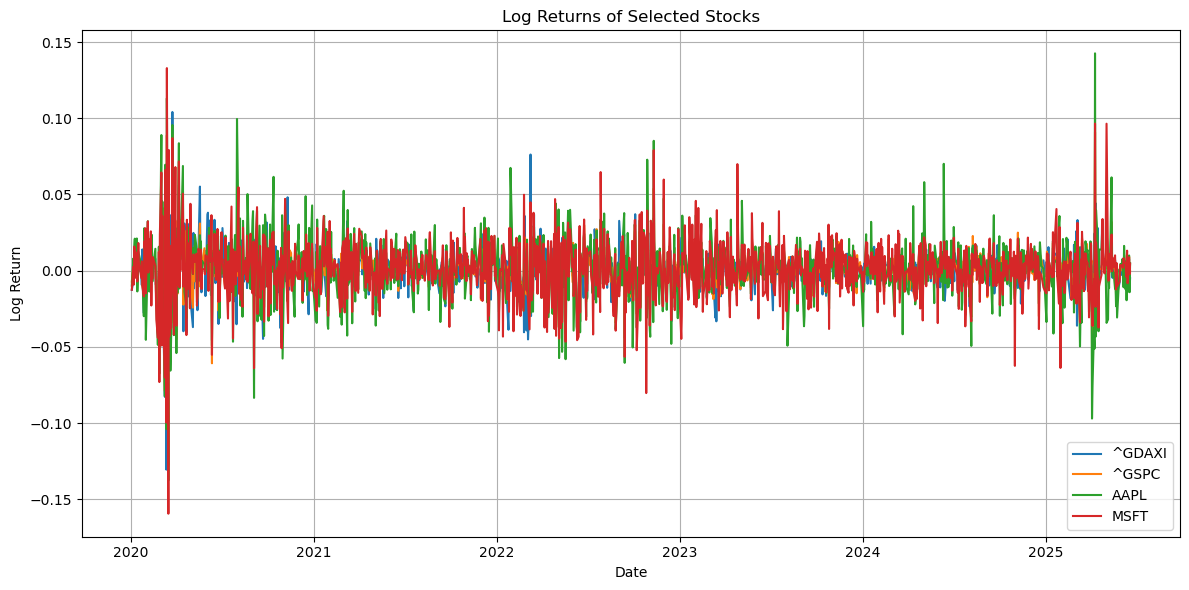

In [27]:
log_ret = np.log(data / data.shift(1)).dropna()
plt.figure(figsize=(12, 6))
for sym in symbols:
    plt.plot(log_ret.index, log_ret[sym], label=sym)

plt.title('Log Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

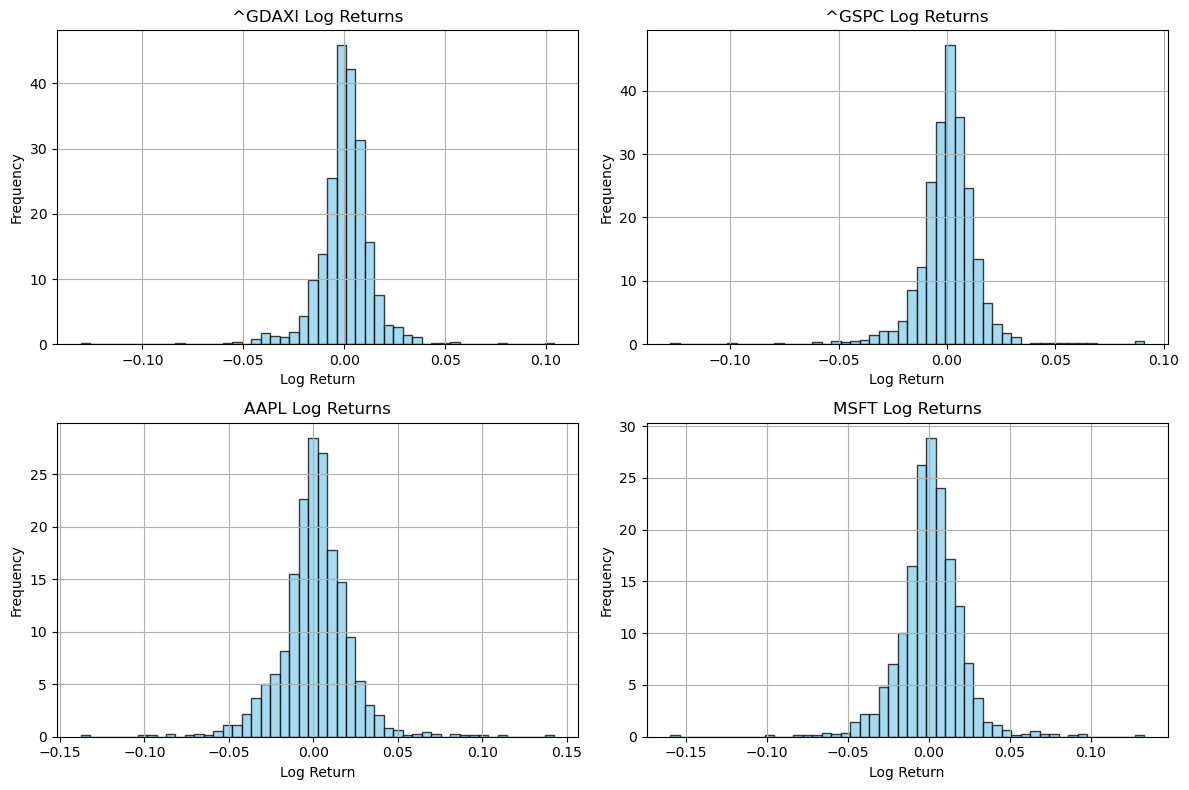

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, sym in enumerate(symbols):
    axes[i].hist(log_ret[sym], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{sym} Log Returns')
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [31]:
for sym in log_ret.columns:
    print(f'\nNormality tests for {sym}:')
    norm_tests(log_ret[sym].values)


Normality tests for ^GDAXI:
skew:              -0.698
skew pval:          0.000
Kurt:              13.112
Kurt pval:          0.000
norm pval:          0.000

Normality tests for ^GSPC:
skew:              -0.640
skew pval:          0.000
Kurt:              13.959
Kurt pval:          0.000
norm pval:          0.000

Normality tests for AAPL:
skew:               0.051
skew pval:          0.447
Kurt:               6.298
Kurt pval:          0.000
norm pval:          0.000

Normality tests for MSFT:
skew:              -0.110
skew pval:          0.102
Kurt:               7.569
Kurt pval:          0.000
norm pval:          0.000


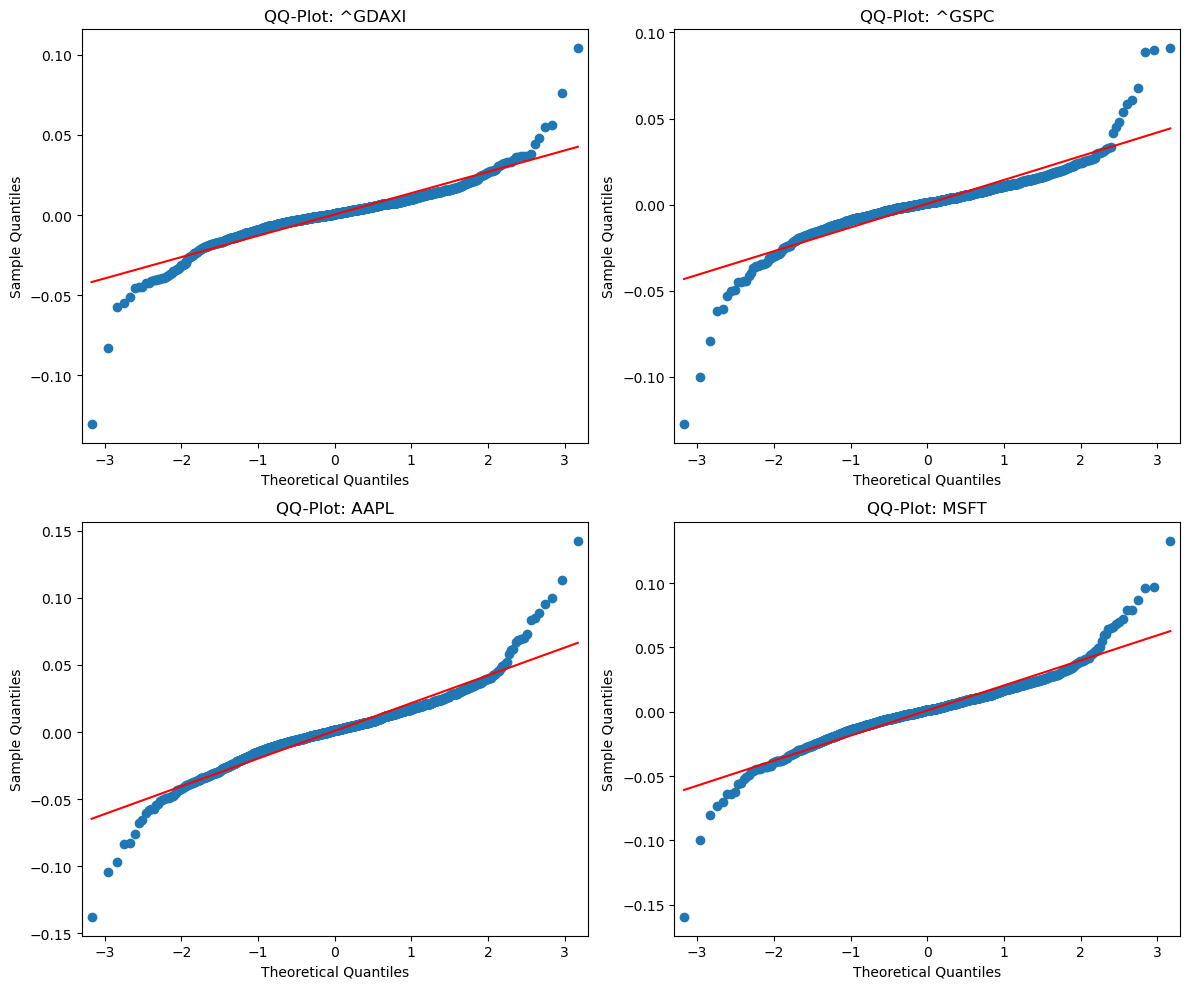

In [32]:

symbols = log_ret.columns[:4]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, sym in enumerate(symbols):
    ax = axes[i // 2, i % 2]
    sm.qqplot(log_ret[sym].dropna(), line='s', ax=ax)
    ax.set_title(f'QQ-Plot: {sym}')

plt.tight_layout()
plt.show()
